In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = 'cirrhosis.csv'

In [21]:

data = pd.read_csv(dataset_path)


In [22]:
columns_to_drop = ['ID']
df = data.drop(columns=columns_to_drop)

In [23]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
cat_cols = ['Status', 'Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Impute numerical data
num_imputer = IterativeImputer(max_iter=10, random_state=0)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical data using logistic regression
for col in cat_cols:
    if df[col].isnull().any():
        # Prepare the data
        not_null_df = df[df[col].notnull()]
        is_null_df = df[df[col].isnull()]
        
        # Encode the categorical variable
        label_encoder = LabelEncoder()
        not_null_df[col] = label_encoder.fit_transform(not_null_df[col])
        
        # Train the logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(not_null_df[num_cols], not_null_df[col])
        
        # Predict the missing values
        predictions = model.predict(is_null_df[num_cols])
        df.loc[df[col].isnull(), col] = label_encoder.inverse_transform(predictions)

# Print the DataFrame to check imputation results
print(df)

     N_Days Status             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0     400.0      D  D-penicillamine  21464.0   F       Y            Y       Y   
1    4500.0      C  D-penicillamine  20617.0   F       N            Y       Y   
2    1012.0      D  D-penicillamine  25594.0   M       N            N       N   
3    1925.0      D  D-penicillamine  19994.0   F       N            Y       Y   
4    1504.0     CL          Placebo  13918.0   F       N            Y       Y   
..      ...    ...              ...      ...  ..     ...          ...     ...   
413   681.0      D  D-penicillamine  24472.0   F       N            Y       N   
414  1103.0      C          Placebo  14245.0   F       N            Y       N   
415  1055.0      C  D-penicillamine  20819.0   F       N            Y       N   
416   691.0      C  D-penicillamine  21185.0   F       N            Y       N   
417   976.0      C  D-penicillamine  19358.0   F       N            N       N   

    Edema  Bilirubin  Chole

In [24]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

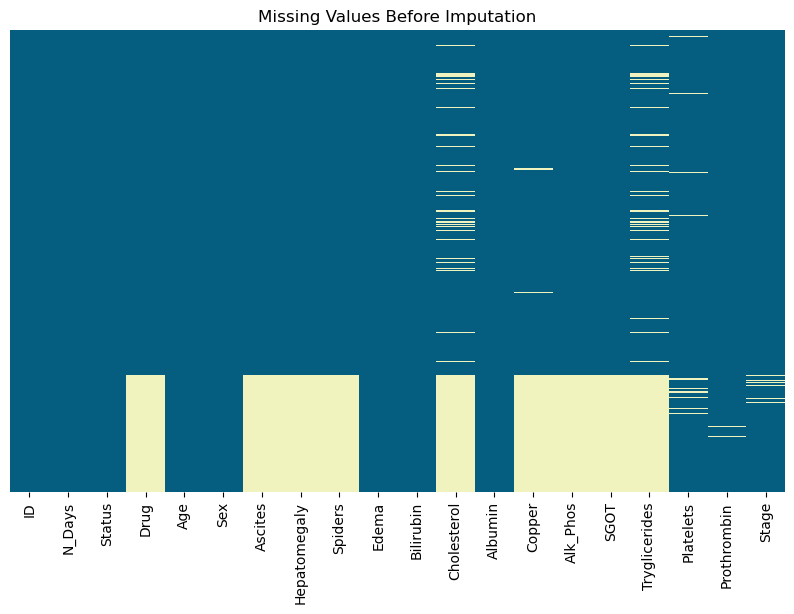

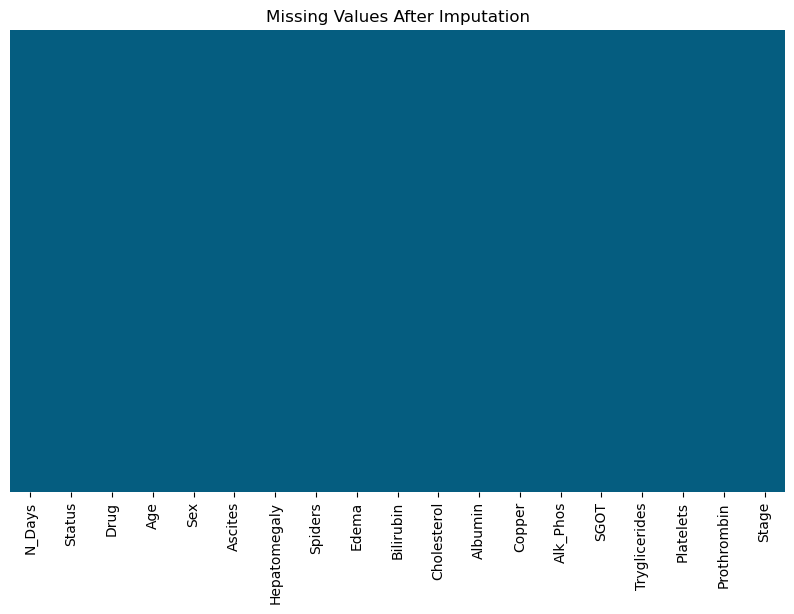

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values before imputation
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette(["#055D80", "#F0F3BD"]), yticklabels=False)
plt.title('Missing Values Before Imputation')
plt.savefig('Missing Values Before Imputation.png')
plt.show()

# After imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(["#055D80", "#F0F3BD"]), yticklabels=False)
plt.title('Missing Values After Imputation')
plt.savefig('Missing Values After Imputation.png')
plt.show()


Stage
1.0     21
2.0     92
3.0    155
4.0    144
dtype: int64


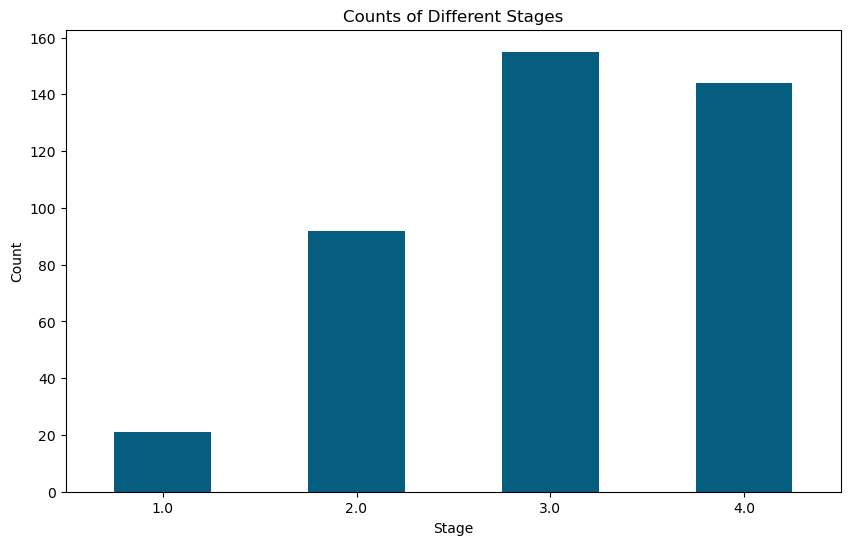

In [26]:
stage_counts = data.groupby('Stage').size()
print(stage_counts)

plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='#055D80')
plt.title('Counts of Different Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('Counts of Different Stage.png')
plt.show()

In [27]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681.0,D,D-penicillamine,24472.0,F,N,Y,N,N,1.2,304.612275,2.96,131.635475,1327.164550,123.343511,114.516915,174.0,10.9,3.0
414,1103.0,C,Placebo,14245.0,F,N,Y,N,N,0.9,393.693109,3.83,116.924455,1534.882836,146.832913,109.608435,180.0,11.2,4.0
415,1055.0,C,D-penicillamine,20819.0,F,N,Y,N,N,1.6,315.593565,3.42,120.895415,1398.056223,130.878192,111.354449,143.0,9.9,3.0
416,691.0,C,D-penicillamine,21185.0,F,N,Y,N,N,0.8,379.742536,3.75,130.816221,1571.134442,128.166942,121.625974,269.0,10.4,3.0


In [28]:
df['Age in years']=round(df['Age']/365,0)

In [29]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age in years
0,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0,59.0
1,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0,56.0
2,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0,70.0
3,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0,55.0
4,1504.0,CL,Placebo,13918.0,F,N,Y,Y,N,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681.0,D,D-penicillamine,24472.0,F,N,Y,N,N,1.2,304.612275,2.96,131.635475,1327.164550,123.343511,114.516915,174.0,10.9,3.0,67.0
414,1103.0,C,Placebo,14245.0,F,N,Y,N,N,0.9,393.693109,3.83,116.924455,1534.882836,146.832913,109.608435,180.0,11.2,4.0,39.0
415,1055.0,C,D-penicillamine,20819.0,F,N,Y,N,N,1.6,315.593565,3.42,120.895415,1398.056223,130.878192,111.354449,143.0,9.9,3.0,57.0
416,691.0,C,D-penicillamine,21185.0,F,N,Y,N,N,0.8,379.742536,3.75,130.816221,1571.134442,128.166942,121.625974,269.0,10.4,3.0,58.0


In [30]:
nan_counts = df.isnull().sum()

# Print the counts of NaN values
print(nan_counts)

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Age in years     0
dtype: int64


In [31]:
df = df.drop(columns=['Age'])

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before SMOTE
print("Distribution of 'Stage' before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after SMOTE
print("\nDistribution of 'Stage' after SMOTE:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with SMOTE
print("\nResults with SMOTE:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with SMOTE...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with SMOTE:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after SMOTE:
Stage
2.0    125
3.0    125
4.0    125
1.0    125
Name: count, dtype: int64

Results with SMOTE:
Training logistic_regression with SMOTE...
Classification report for logistic_regression with SMOTE:

              precision    recall  f1-score   support

         1.0       0.06      0.25      0.10         4
         2.0       0.19      0.21      0.20        19
         3.0       0.47      0.44      0.45        32
         4.0       0.76      0.45      0.57        29

    accuracy                           0.38        84
   macro avg       0.37      0.34      0.33        84
weighted avg       0.49      0.38      0.42        84

Training knn with SMOTE...
Classification report for knn with SMOTE:

              precision    recall  f1-score   support

         1.0       0.11      0.50      0.18         4
         2.0       0.23      0.26  

In [33]:
## Borderline SMOTE

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import BorderlineSMOTE

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before Borderline SMOTE 1
print("Distribution of 'Stage' before Borderline SMOTE 1:")
print(y_train.value_counts())

# Apply Borderline SMOTE 1 to handle class imbalance
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_train_res, y_train_res = borderline_smote.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after Borderline SMOTE 1
print("\nDistribution of 'Stage' after Borderline SMOTE 1:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with Borderline SMOTE 1
print("\nResults with Borderline SMOTE 1:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with Borderline SMOTE 1...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with Borderline SMOTE 1:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before Borderline SMOTE 1:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after Borderline SMOTE 1:
Stage
2.0    125
3.0    125
4.0    125
1.0    125
Name: count, dtype: int64

Results with Borderline SMOTE 1:
Training logistic_regression with Borderline SMOTE 1...
Classification report for logistic_regression with Borderline SMOTE 1:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.17      0.21      0.19        19
         3.0       0.43      0.41      0.42        32
         4.0       0.68      0.45      0.54        29

    accuracy                           0.36        84
   macro avg       0.32      0.27      0.29        84
weighted avg       0.44      0.36      0.39        84

Training knn with Borderline SMOTE 1...
Classification report for knn with Borderline SMOTE 1:

              precision    recall  f1-score   support

In [35]:
##safe level smote

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from crucio import SLS

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before SLS
print("Distribution of 'Stage' before SLS:")
print(y_train.value_counts())

# Apply Safe-Level SMOTE (SLS) to handle class imbalance
sls = SLS()
balanced_df = sls.balance(pd.concat([pd.DataFrame(X_train), y_train.reset_index(drop=True)], axis=1), 'Stage')

# Separate the resampled features and target
X_train_res = balanced_df.drop(columns=['Stage'])
y_train_res = balanced_df['Stage']

# Display the distribution of the 'Stage' category after SLS
print("\nDistribution of 'Stage' after SLS:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with SLS
print("\nResults with SLS:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with SLS...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with SLS:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before SLS:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after SLS:
Stage
4.0    125
2.0    125
3.0    125
1.0     26
Name: count, dtype: int64

Results with SLS:
Training logistic_regression with SLS...
Classification report for logistic_regression with SLS:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.26      0.37      0.30        19
         3.0       0.43      0.50      0.46        32
         4.0       0.78      0.48      0.60        29

    accuracy                           0.44        84
   macro avg       0.37      0.34      0.34        84
weighted avg       0.49      0.44      0.45        84

Training knn with SLS...
Classification report for knn with SLS:

              precision    recall  f1-score   support

         1.0       0.20      0.25      0.22         4
         2.0       0.21      0.37      0.27      

In [37]:
#Smote Tomek

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before SMOTE Tomek
print("Distribution of 'Stage' before SMOTE Tomek:")
print(y_train.value_counts())

# Apply SMOTE Tomek to handle class imbalance
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after SMOTE Tomek
print("\nDistribution of 'Stage' after SMOTE Tomek:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with SMOTE Tomek
print("\nResults with SMOTE Tomek:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with SMOTE Tomek...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with SMOTE Tomek:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before SMOTE Tomek:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after SMOTE Tomek:
Stage
2.0    109
1.0    109
4.0    103
3.0     91
Name: count, dtype: int64

Results with SMOTE Tomek:
Training logistic_regression with SMOTE Tomek...
Classification report for logistic_regression with SMOTE Tomek:

              precision    recall  f1-score   support

         1.0       0.06      0.25      0.10         4
         2.0       0.24      0.26      0.25        19
         3.0       0.41      0.34      0.37        32
         4.0       0.74      0.48      0.58        29

    accuracy                           0.37        84
   macro avg       0.36      0.33      0.33        84
weighted avg       0.47      0.37      0.40        84

Training knn with SMOTE Tomek...
Classification report for knn with SMOTE Tomek:

              precision    recall  f1-score   support

         1.0       0.11      0.50      0.18    

In [39]:
#Smote Rknn

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

class SMOTE_RkNN:
    def __init__(self, k_neighbors=5, random_state=None):
        self.k_neighbors = k_neighbors
        self.random_state = random_state
        self.smote = SMOTE(k_neighbors=k_neighbors, random_state=random_state)

    def fit_resample(self, X, y):
        # Step 1: Apply SMOTE
        X_res, y_res = self.smote.fit_resample(X, y)
        
        # Step 2: Calculate RkNN for minority class samples
        nn = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        nn.fit(X_res)
        distances, indices = nn.kneighbors(X_res)

        reverse_knn_counts = np.zeros(X_res.shape[0], dtype=int)
        for i, neighbors in enumerate(indices):
            for neighbor in neighbors[1:]:  # Skip the first neighbor (the point itself)
                if y_res[i] == y_res[neighbor]:
                    reverse_knn_counts[neighbor] += 1

        # Step 3: Filter based on RkNN counts
        threshold = np.percentile(reverse_knn_counts, 25)  # or another threshold of your choice
        mask = reverse_knn_counts >= threshold
        X_res_filtered = X_res[mask]
        y_res_filtered = y_res[mask]

        return X_res_filtered, y_res_filtered

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before SMOTE-RkNN
print("Distribution of 'Stage' before SMOTE-RkNN:")
print(y_train.value_counts())

# Apply SMOTE-RkNN to handle class imbalance
smote_rknn = SMOTE_RkNN(random_state=42)
X_train_res, y_train_res = smote_rknn.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after SMOTE-RkNN
print("\nDistribution of 'Stage' after SMOTE-RkNN:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with SMOTE-RkNN
print("\nResults with SMOTE-RkNN:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with SMOTE-RkNN...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with SMOTE-RkNN:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before SMOTE-RkNN:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after SMOTE-RkNN:
Stage
1.0    119
2.0    102
3.0     99
4.0     96
Name: count, dtype: int64

Results with SMOTE-RkNN:
Training logistic_regression with SMOTE-RkNN...
Classification report for logistic_regression with SMOTE-RkNN:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.21      0.21      0.21        19
         3.0       0.38      0.41      0.39        32
         4.0       0.67      0.34      0.45        29

    accuracy                           0.32        84
   macro avg       0.31      0.24      0.26        84
weighted avg       0.42      0.32      0.35        84

Training knn with SMOTE-RkNN...
Classification report for knn with SMOTE-RkNN:

              precision    recall  f1-score   support

         1.0       0.10      0.50      0.17         4


In [41]:
#SVM Smote

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SVMSMOTE

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before SVM-SMOTE
print("Distribution of 'Stage' before SVM-SMOTE:")
print(y_train.value_counts())

# Apply SVM-SMOTE to handle class imbalance
svm_smote = SVMSMOTE(random_state=42)
X_train_res, y_train_res = svm_smote.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after SVM-SMOTE
print("\nDistribution of 'Stage' after SVM-SMOTE:")
print(y_train_res.value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with SVM-SMOTE
print("\nResults with SVM-SMOTE:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with SVM-SMOTE...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with SVM-SMOTE:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before SVM-SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after SVM-SMOTE:
Stage
2.0    125
3.0    125
4.0    125
1.0     76
Name: count, dtype: int64

Results with SVM-SMOTE:
Training logistic_regression with SVM-SMOTE...
Classification report for logistic_regression with SVM-SMOTE:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.14      0.16      0.15        19
         3.0       0.44      0.47      0.45        32
         4.0       0.74      0.48      0.58        29

    accuracy                           0.38        84
   macro avg       0.33      0.28      0.30        84
weighted avg       0.45      0.38      0.41        84

Training knn with SVM-SMOTE...
Classification report for knn with SVM-SMOTE:

              precision    recall  f1-score   support

         1.0       0.08      0.25      0.12         4
       

In [43]:
# KD SMote

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

class KD_SMOTE:
    def __init__(self, k_neighbors=5, random_state=None, target_samples_per_class=125):
        self.k_neighbors = k_neighbors
        self.random_state = random_state
        self.target_samples_per_class = target_samples_per_class
        self.smote = SMOTE(k_neighbors=k_neighbors, random_state=random_state)

    def fit_resample(self, X, y):
        # Apply SMOTE but control the oversampling
        X_res, y_res = self.smote.fit_resample(X, y)
        # Limit the number of samples after SMOTE
        X_final, y_final = [], []
        for label in np.unique(y_res):
            indices = np.where(y_res == label)[0]
            if len(indices) > self.target_samples_per_class:
                indices = np.random.choice(indices, self.target_samples_per_class, replace=False)
            X_final.append(X_res[indices])
            y_final.append(y_res[indices])
        
        X_final = np.vstack(X_final)
        y_final = np.hstack(y_final)
        
        # Generate additional synthetic samples if needed
        nn = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        nn.fit(X_final)
        distances, indices = nn.kneighbors(X_final)

        synthetic_samples = []
        synthetic_labels = []
        samples_count = {label: len(np.where(y_final == label)[0]) for label in np.unique(y_final)}

        for i, cluster in enumerate(indices):
            current_class = y_final[cluster[0]]
            if samples_count[current_class] >= self.target_samples_per_class:
                continue  # Skip if limit is reached
            centroid = np.mean(X_final[cluster], axis=0)
            for neighbor in cluster[1:]:  # Skip the first element (itself)
                if samples_count[current_class] < self.target_samples_per_class:
                    new_sample = centroid + np.random.randn(*centroid.shape) * 0.01
                    synthetic_samples.append(new_sample)
                    synthetic_labels.append(current_class)
                    samples_count[current_class] += 1
                    if samples_count[current_class] >= self.target_samples_per_class:
                        break

        if synthetic_samples:
            X_synthetic = np.array(synthetic_samples)
            y_synthetic = np.array(synthetic_labels)

            X_final = np.vstack((X_final, X_synthetic))
            y_final = np.hstack((y_final, y_synthetic))

        return X_final, y_final


# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your categorical variables and the dependent variable
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

# Split the data into features and target variable
X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

# Define the preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution of the 'Stage' category before KD-SMOTE
print("Distribution of 'Stage' before KD-SMOTE:")
print(y_train.value_counts())

# Apply KD-SMOTE to handle class imbalance
kd_smote = KD_SMOTE(random_state=42, target_samples_per_class=125)
X_train_res, y_train_res = kd_smote.fit_resample(X_train, y_train)

# Display the distribution of the 'Stage' category after KD-SMOTE
print("\nDistribution of 'Stage' after KD-SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Create a common pipeline structure
def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Define the models
models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model with KD-SMOTE
print("\nResults with KD-SMOTE:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with KD-SMOTE...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with KD-SMOTE:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before KD-SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Distribution of 'Stage' after KD-SMOTE:
1.0    125
2.0    125
3.0    125
4.0    125
Name: count, dtype: int64

Results with KD-SMOTE:
Training logistic_regression with KD-SMOTE...
Classification report for logistic_regression with KD-SMOTE:

              precision    recall  f1-score   support

         1.0       0.06      0.25      0.10         4
         2.0       0.19      0.21      0.20        19
         3.0       0.47      0.44      0.45        32
         4.0       0.76      0.45      0.57        29

    accuracy                           0.38        84
   macro avg       0.37      0.34      0.33        84
weighted avg       0.49      0.38      0.42        84

Training knn with KD-SMOTE...
Classification report for knn with KD-SMOTE:

              precision    recall  f1-score   support

         1.0       0.11      0.50      0.18         4
         2.0       0

In [45]:
#KNS Smote

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

class KNS_SMOTE:
    def __init__(self, k_neighbors=5, random_state=None, target_samples_per_class=125):
        self.k_neighbors = k_neighbors
        self.random_state = random_state
        self.target_samples_per_class = target_samples_per_class
        self.smote = SMOTE(k_neighbors=k_neighbors, random_state=random_state)

    def fit_resample(self, X, y):
        X_res, y_res = self.smote.fit_resample(X, y)
        unique_classes = np.unique(y_res)
        nn = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        nn.fit(X_res)
        distances, indices = nn.kneighbors(X_res)

        synthetic_samples = []
        synthetic_labels = []

        for class_label in unique_classes:
            class_indices = np.where(y_res == class_label)[0]
            n_current_samples = len(class_indices)
            
            if n_current_samples < self.target_samples_per_class:
                n_needed_samples = self.target_samples_per_class - n_current_samples
                print(f"Generating {n_needed_samples} synthetic samples for class {class_label}")

                for _ in range(n_needed_samples):
                    i = np.random.choice(class_indices)
                    subspace = X_res[indices[i][1:]]
                    centroid = np.mean(subspace, axis=0)
                    new_sample = centroid + np.random.randn(*centroid.shape) * 0.01
                    synthetic_samples.append(new_sample)
                    synthetic_labels.append(class_label)

        if synthetic_samples:
            X_synthetic = np.array(synthetic_samples)
            y_synthetic = np.array(synthetic_labels)

            X_resampled = np.vstack((X_res, X_synthetic))
            y_resampled = np.hstack((y_res, y_synthetic))
        else:
            print("No synthetic samples generated; using only SMOTE samples.")
            X_resampled = X_res
            y_resampled = y_res

        X_final, y_final = [], []
        
        for class_label in unique_classes:
            class_indices = np.where(y_resampled == class_label)[0]
            selected_indices = np.random.choice(class_indices, self.target_samples_per_class, replace=False)
            X_final.append(X_resampled[selected_indices])
            y_final.append(y_resampled[selected_indices])

        X_final = np.vstack(X_final)
        y_final = np.hstack(y_final)

        return X_final, y_final

# Assume you have loaded your dataset as 'df'
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Distribution of 'Stage' before KNS-SMOTE:")
print(y_train.value_counts())

kns_smote = KNS_SMOTE(random_state=42, target_samples_per_class=125)
X_train_res, y_train_res = kns_smote.fit_resample(X_train, y_train)

print("\nDistribution of 'Stage' after KNS-SMOTE:")
print(pd.Series(y_train_res).value_counts())

def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

print("\nResults with KNS-SMOTE:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with KNS-SMOTE...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with KNS-SMOTE:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before KNS-SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64
No synthetic samples generated; using only SMOTE samples.

Distribution of 'Stage' after KNS-SMOTE:
1.0    125
2.0    125
3.0    125
4.0    125
Name: count, dtype: int64

Results with KNS-SMOTE:
Training logistic_regression with KNS-SMOTE...
Classification report for logistic_regression with KNS-SMOTE:

              precision    recall  f1-score   support

         1.0       0.06      0.25      0.10         4
         2.0       0.19      0.21      0.20        19
         3.0       0.47      0.44      0.45        32
         4.0       0.76      0.45      0.57        29

    accuracy                           0.38        84
   macro avg       0.37      0.34      0.33        84
weighted avg       0.49      0.38      0.42        84

Training knn with KNS-SMOTE...
Classification report for knn with KNS-SMOTE:

              precision    recall  f1-score   support

         

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

class AdaptiveSMOTE:
    def __init__(self, k_neighbors=5, random_state=None, target_samples_per_class=125, sampling_strategy='auto'):
        self.k_neighbors = k_neighbors
        self.random_state = random_state
        self.target_samples_per_class = target_samples_per_class
        self.sampling_strategy = sampling_strategy
        self.adasyn = ADASYN(n_neighbors=k_neighbors, random_state=random_state, sampling_strategy=sampling_strategy)

    def fit_resample(self, X, y):
        try:
            X_res, y_res = self.adasyn.fit_resample(X, y)
        except ValueError as e:
            print(f"ADASYN Error: {e}")
            print("No samples were generated. Returning the original dataset.")
            return X, y

        unique_classes = np.unique(y_res)
        nn = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        nn.fit(X_res)
        distances, indices = nn.kneighbors(X_res)

        synthetic_samples = []
        synthetic_labels = []

        for class_label in unique_classes:
            class_indices = np.where(y_res == class_label)[0]
            n_current_samples = len(class_indices)
            
            if n_current_samples < self.target_samples_per_class:
                n_needed_samples = self.target_samples_per_class - n_current_samples
                print(f"Generating {n_needed_samples} synthetic samples for class {class_label}")

                for _ in range(n_needed_samples):
                    i = np.random.choice(class_indices)
                    subspace = X_res[indices[i][1:]]
                    centroid = np.mean(subspace, axis=0)
                    new_sample = centroid + np.random.randn(*centroid.shape) * 0.01
                    synthetic_samples.append(new_sample)
                    synthetic_labels.append(class_label)

        if synthetic_samples:
            X_synthetic = np.array(synthetic_samples)
            y_synthetic = np.array(synthetic_labels)

            X_resampled = np.vstack((X_res, X_synthetic))
            y_resampled = np.hstack((y_res, y_synthetic))
        else:
            print("No synthetic samples generated; using only ADASYN samples.")
            X_resampled = X_res
            y_resampled = y_res

        X_final, y_final = [], []
        
        for class_label in unique_classes:
            class_indices = np.where(y_resampled == class_label)[0]
            selected_indices = np.random.choice(class_indices, self.target_samples_per_class, replace=False)
            X_final.append(X_resampled[selected_indices])
            y_final.append(y_resampled[selected_indices])

        X_final = np.vstack(X_final)
        y_final = np.hstack(y_final)

        return X_final, y_final

# Assume you have loaded your dataset as 'df'
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
dependent_variable = 'Stage'

X = df.drop(columns=[dependent_variable])
y = df[dependent_variable]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_vars)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Distribution of 'Stage' before Adaptive SMOTE:")
print(y_train.value_counts())

adaptive_smote = AdaptiveSMOTE(random_state=42, target_samples_per_class=125)
X_train_res, y_train_res = adaptive_smote.fit_resample(X_train, y_train)

print("\nDistribution of 'Stage' after Adaptive SMOTE:")
print(pd.Series(y_train_res).value_counts())

def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

print("\nResults with Adaptive SMOTE:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} with Adaptive SMOTE...")
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} with Adaptive SMOTE:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before Adaptive SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64
ADASYN Error: No samples will be generated with the provided ratio settings.
No samples were generated. Returning the original dataset.

Distribution of 'Stage' after Adaptive SMOTE:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Results with Adaptive SMOTE:
Training logistic_regression with Adaptive SMOTE...
Classification report for logistic_regression with Adaptive SMOTE:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.25      0.21      0.23        19
         3.0       0.43      0.66      0.52        32
         4.0       0.78      0.48      0.60        29

    accuracy                           0.46        84
   macro avg       0.36      0.34      0.34        84
weighted avg       0.49      0.46      0.45        84

Training knn with Adaptive SMOTE.

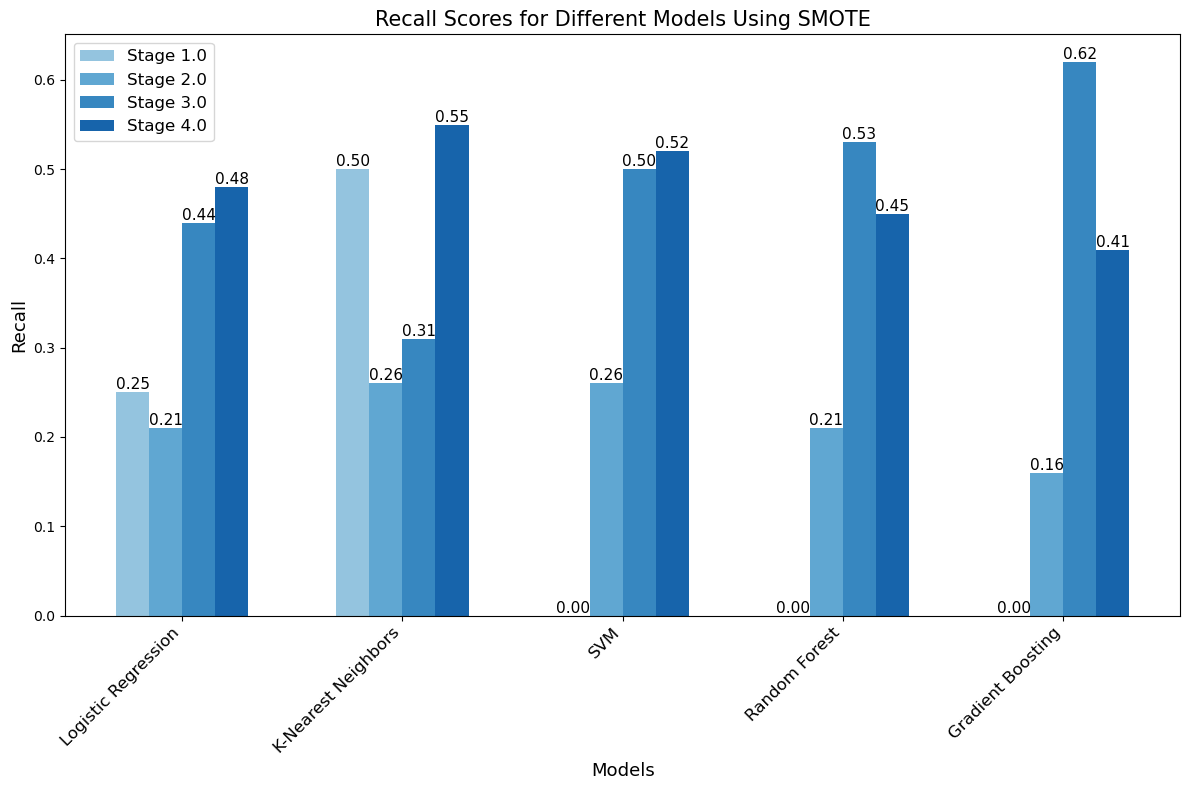

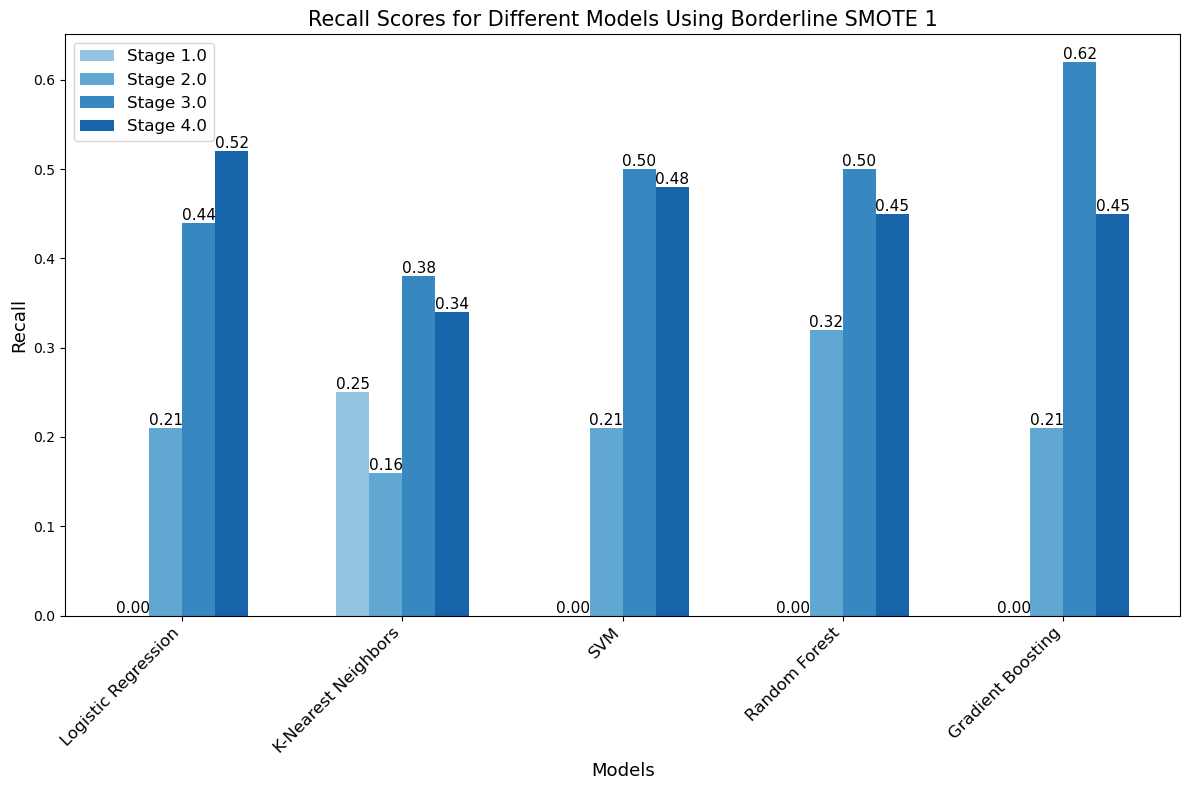

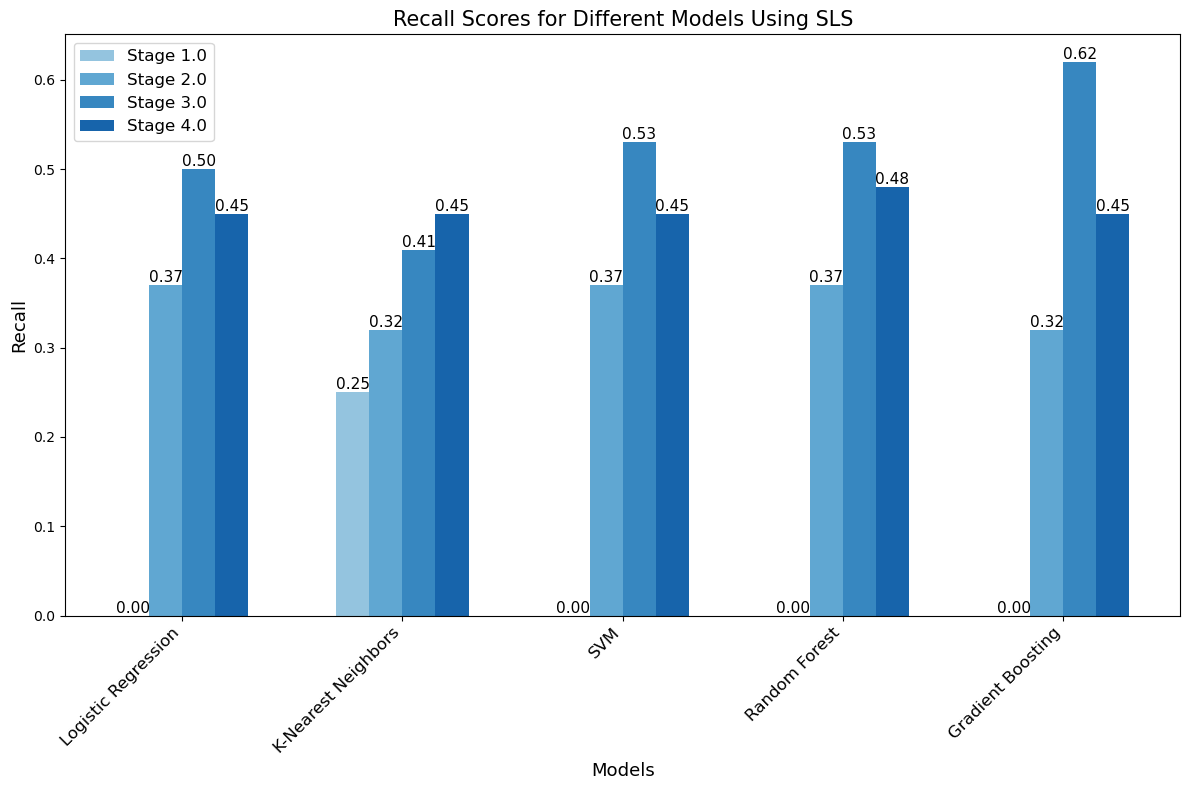

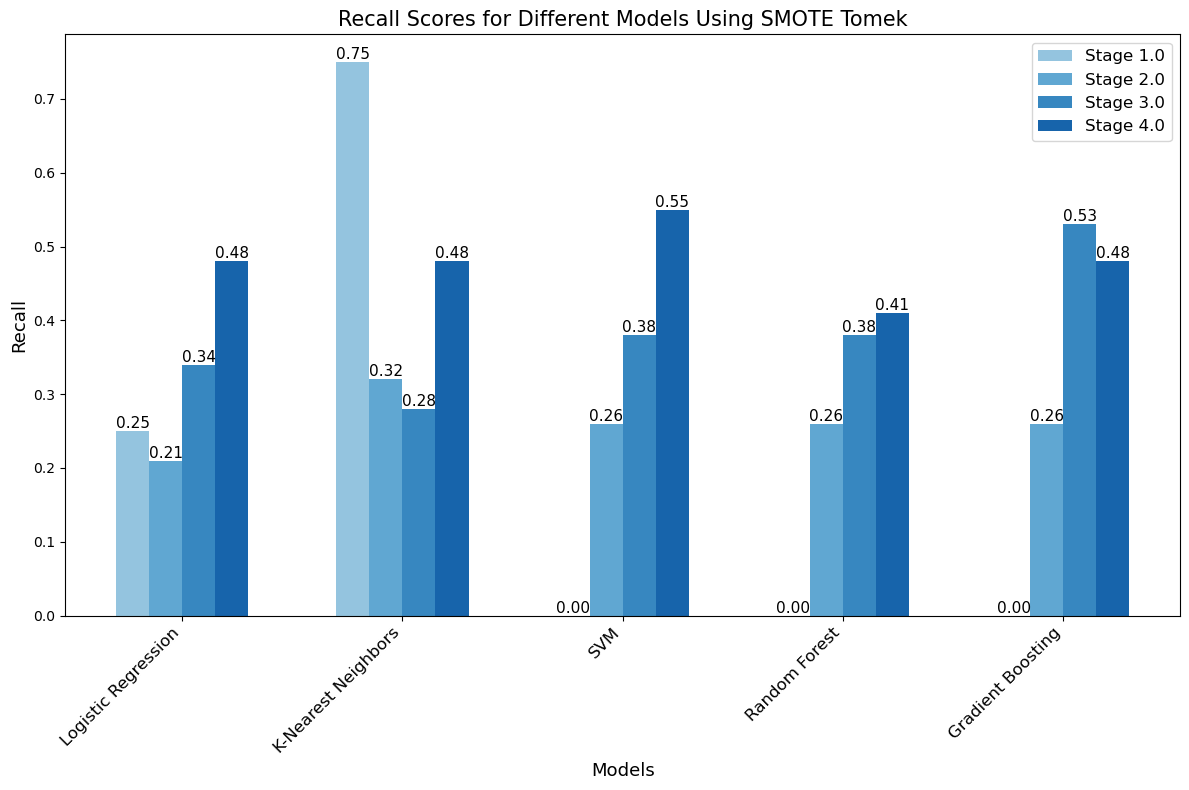

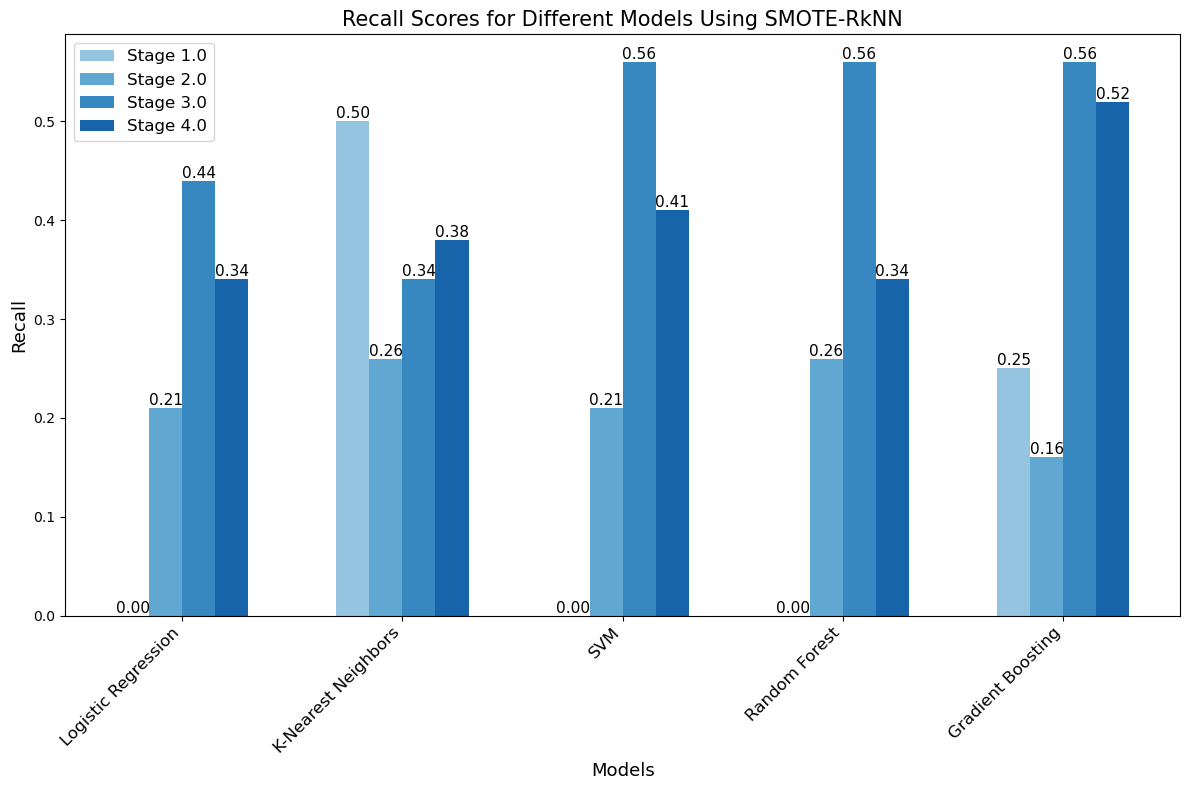

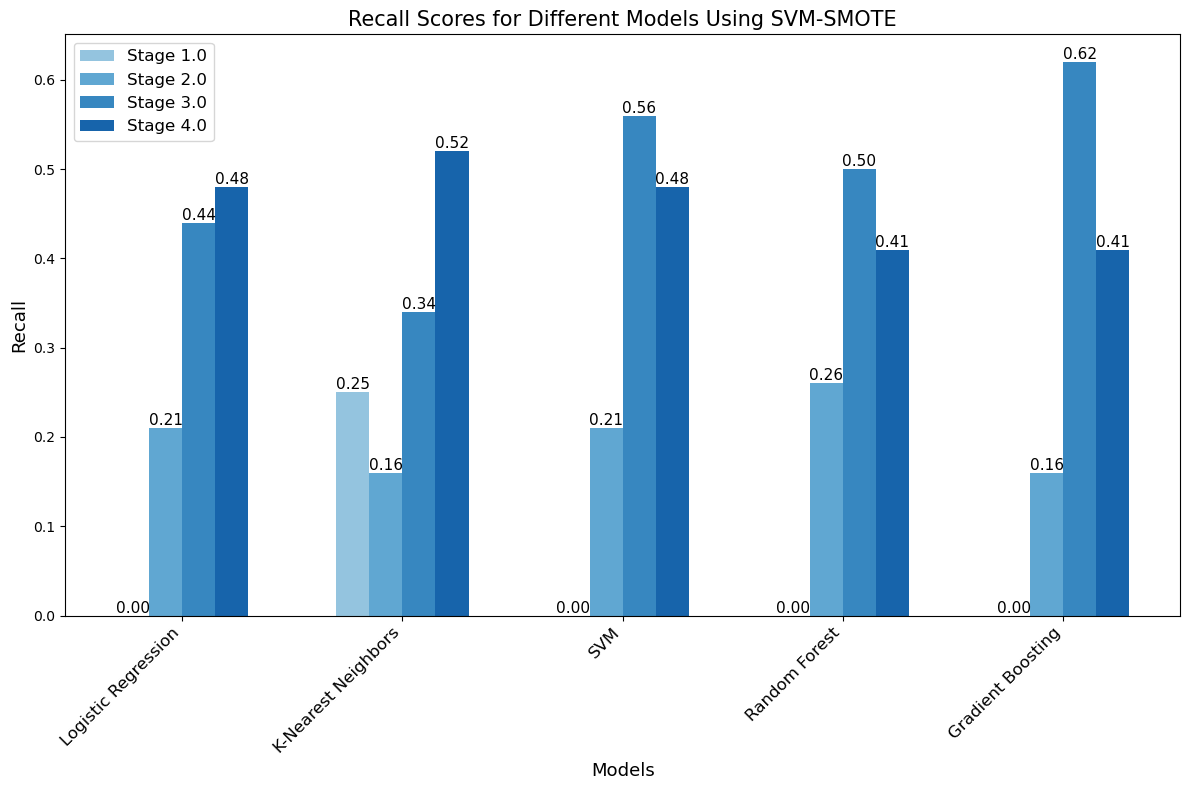

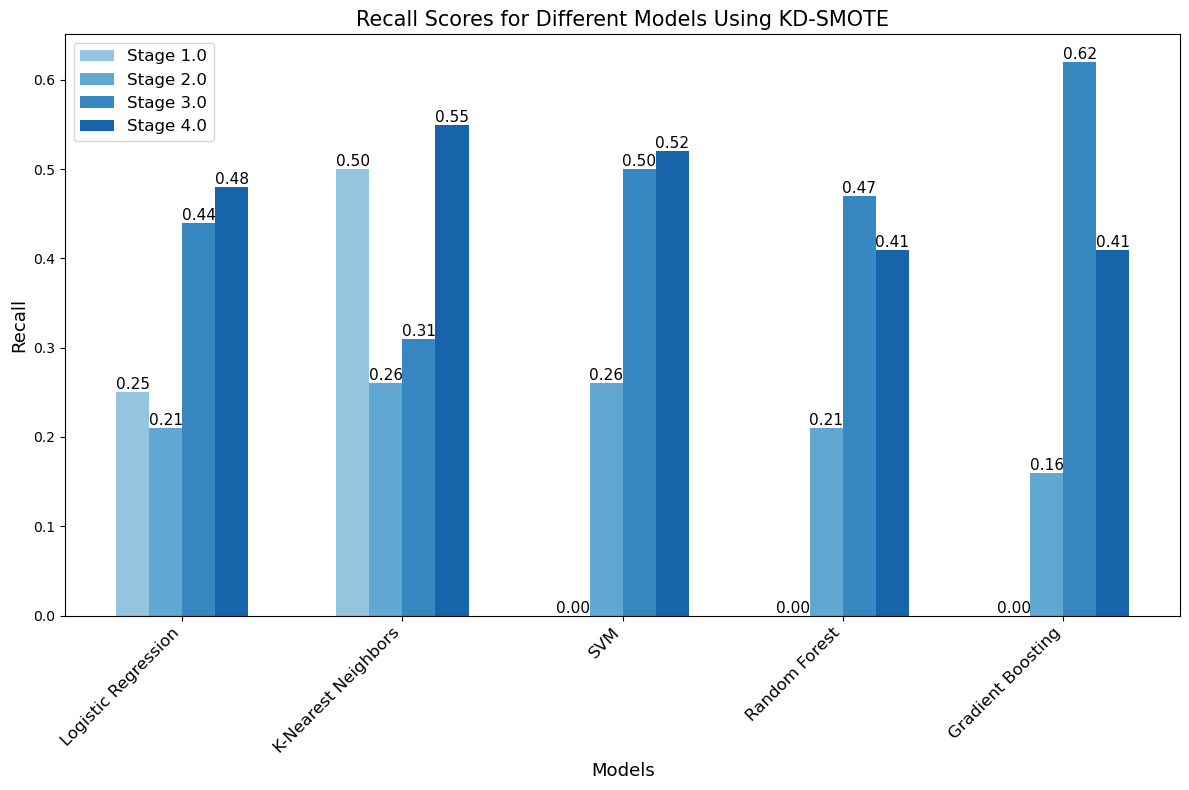

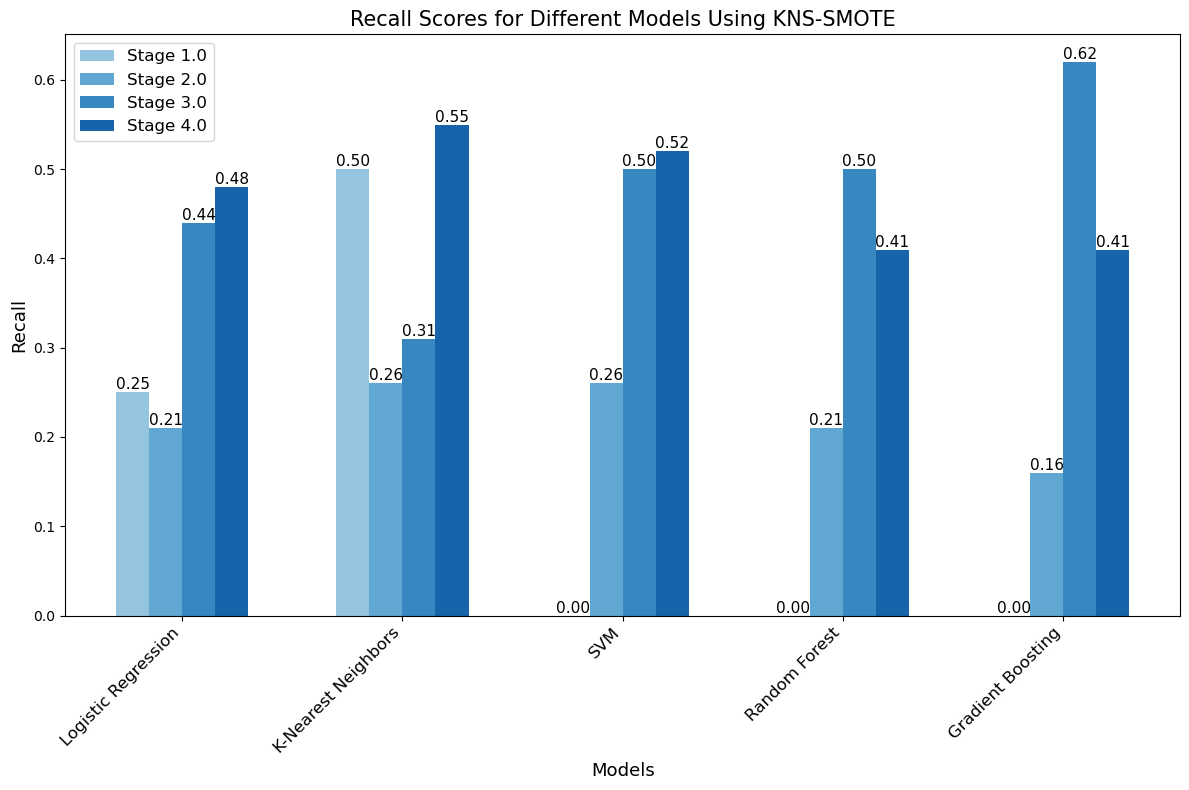

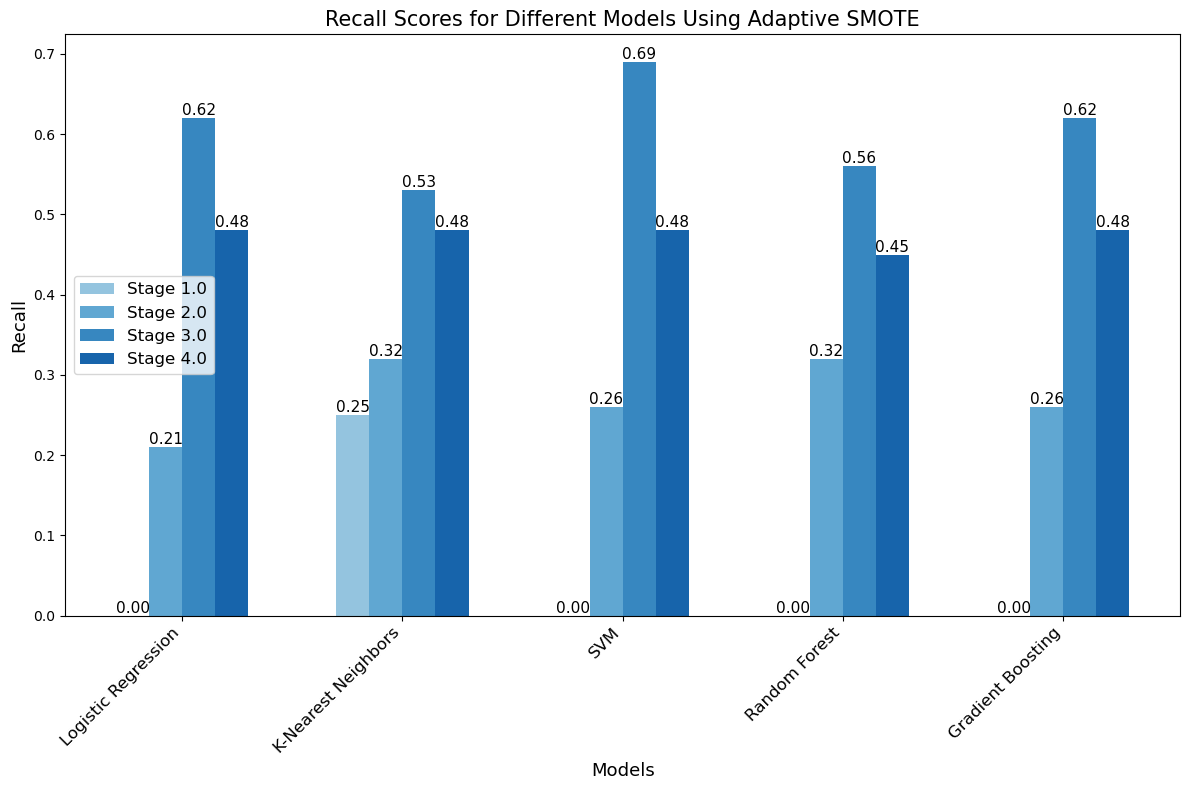

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Recall scores from the classification reports
recall_scores = {
    'SMOTE': {
        'Logistic Regression': [0.25, 0.21, 0.44, 0.48],
        'K-Nearest Neighbors': [0.50, 0.26, 0.31, 0.55],
        'SVM': [0.00, 0.26, 0.50, 0.52],
        'Random Forest': [0.00, 0.21, 0.53, 0.45],
        'Gradient Boosting': [0.00, 0.16, 0.62, 0.41]
    },
    'Borderline SMOTE 1': {
        'Logistic Regression': [0.00, 0.21, 0.44, 0.52],
        'K-Nearest Neighbors': [0.25, 0.16, 0.38, 0.34],
        'SVM': [0.00, 0.21, 0.50, 0.48],
        'Random Forest': [0.00, 0.32, 0.50, 0.45],
        'Gradient Boosting': [0.00, 0.21, 0.62, 0.45]
    },
    'SLS': {
        'Logistic Regression': [0.00, 0.37, 0.50, 0.45],
        'K-Nearest Neighbors': [0.25, 0.32, 0.41, 0.45],
        'SVM': [0.00, 0.37, 0.53, 0.45],
        'Random Forest': [0.00, 0.37, 0.53, 0.48],
        'Gradient Boosting': [0.00, 0.32, 0.62, 0.45]
    },
    'SMOTE Tomek': {
        'Logistic Regression': [0.25, 0.21, 0.34, 0.48],
        'K-Nearest Neighbors': [0.75, 0.32, 0.28, 0.48],
        'SVM': [0.00, 0.26, 0.38, 0.55],
        'Random Forest': [0.00, 0.26, 0.38, 0.41],
        'Gradient Boosting': [0.00, 0.26, 0.53, 0.48]
    },
    'SMOTE-RkNN': {
        'Logistic Regression': [0.00, 0.21, 0.44, 0.34],
        'K-Nearest Neighbors': [0.50, 0.26, 0.34, 0.38],
        'SVM': [0.00, 0.21, 0.56, 0.41],
        'Random Forest': [0.00, 0.26, 0.56, 0.34],
        'Gradient Boosting': [0.25, 0.16, 0.56, 0.52]
    },
    'SVM-SMOTE': {
        'Logistic Regression': [0.00, 0.21, 0.44, 0.48],
        'K-Nearest Neighbors': [0.25, 0.16, 0.34, 0.52],
        'SVM': [0.00, 0.21, 0.56, 0.48],
        'Random Forest': [0.00, 0.26, 0.50, 0.41],
        'Gradient Boosting': [0.00, 0.16, 0.62, 0.41]
    },
    'KD-SMOTE': {
        'Logistic Regression': [0.25, 0.21, 0.44, 0.48],
        'K-Nearest Neighbors': [0.50, 0.26, 0.31, 0.55],
        'SVM': [0.00, 0.26, 0.50, 0.52],
        'Random Forest': [0.00, 0.21, 0.47, 0.41],
        'Gradient Boosting': [0.00, 0.16, 0.62, 0.41]
    },
    'KNS-SMOTE': {
        'Logistic Regression': [0.25, 0.21, 0.44, 0.48],
        'K-Nearest Neighbors': [0.50, 0.26, 0.31, 0.55],
        'SVM': [0.00, 0.26, 0.50, 0.52],
        'Random Forest': [0.00, 0.21, 0.50, 0.41],
        'Gradient Boosting': [0.00, 0.16, 0.62, 0.41]
    },
    'Adaptive SMOTE': {
        'Logistic Regression': [0.00, 0.21, 0.62, 0.48],
        'K-Nearest Neighbors': [0.25, 0.32, 0.53, 0.48],
        'SVM': [0.00, 0.26, 0.69, 0.48],
        'Random Forest': [0.00, 0.32, 0.56, 0.45],
        'Gradient Boosting': [0.00, 0.26, 0.62, 0.48]
    }
}

# Models
models = ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Random Forest', 'Gradient Boosting']

# SMOTE Techniques
smote_techniques = list(recall_scores.keys())

# Colors (shades of blue)
colors = cm.Blues(np.linspace(0.4, 0.8, 4))

# Plotting and saving
for smote in smote_techniques:
    fig, ax = plt.subplots(figsize=(12, 8))  # Increased the figure size for better readability
    index = np.arange(len(models))
    bar_width = 0.15

    for i, stage in enumerate([1.0, 2.0, 3.0, 4.0]):
        recalls = [recall_scores[smote][model][i] for model in models]
        bars = ax.bar(index + i * bar_width, recalls, bar_width, color=colors[i], label=f'Stage {stage}')
        
        # Add data labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=11)  # Increase font size by 1 unit

    ax.set_xlabel('Models', fontsize=13)  # Increase x-axis label size by 1 unit
    ax.set_ylabel('Recall', fontsize=13)  # Increase y-axis label size by 1 unit
    ax.set_title(f'Recall Scores for Different Models Using {smote}', fontsize=15)  # Increase title size by 1 unit
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12)  # Increase tick label size by 1 unit
    ax.legend(fontsize=12)  # Increase legend font size by 1 unit

    plt.tight_layout()
    plt.savefig(f'{smote}_recall_chart.png')  # Save each chart separately
    plt.show()  # Show the plot
    plt.close()  # Close the figure after saving


In [49]:
# After splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Distribution of 'Stage' before any resampling:")
print(y_train.value_counts())

def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),  # Scale features
        ('classifier', model)  # Apply classifier
    ])

models = {
    'logistic_regression': LogisticRegression(random_state=42),
    'knn': KNeighborsClassifier(),
    'svm': SVC(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boosting': GradientBoostingClassifier(random_state=42)
}

# Training and evaluating the models without SMOTE
print("\nResults without any resampling:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    print(f"Training {model_name} without resampling...")
    pipeline.fit(X_train, y_train)  # Use original training data
    y_pred = pipeline.predict(X_test)
    print(f"Classification report for {model_name} without resampling:\n")
    print(classification_report(y_test, y_pred))


Distribution of 'Stage' before any resampling:
Stage
3.0    125
4.0    118
2.0     74
1.0     17
Name: count, dtype: int64

Results without any resampling:
Training logistic_regression without resampling...
Classification report for logistic_regression without resampling:

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.25      0.21      0.23        19
         3.0       0.43      0.66      0.52        32
         4.0       0.78      0.48      0.60        29

    accuracy                           0.46        84
   macro avg       0.36      0.34      0.34        84
weighted avg       0.49      0.46      0.45        84

Training knn without resampling...
Classification report for knn without resampling:

              precision    recall  f1-score   support

         1.0       0.33      0.25      0.29         4
         2.0       0.25      0.32      0.28        19
         3.0       0.49      0.53      0.5

[[0.25       0.25       0.5        0.        ]
 [0.         0.21052632 0.63157895 0.15789474]
 [0.         0.15625    0.71875    0.125     ]
 [0.         0.10344828 0.4137931  0.48275862]]


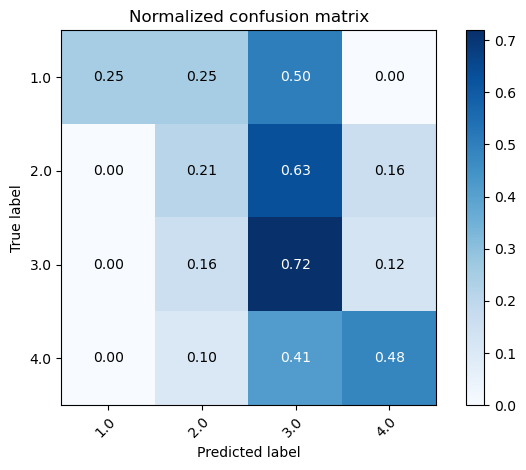

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Example of creating a confusion matrix for the logistic regression model
y_pred_lr = pipeline.predict(X_test)  # assuming 'pipeline' is your trained model
plot_confusion_matrix(y_test, y_pred_lr, classes=np.unique(y), normalize=True,
                      title='Normalized confusion matrix for logistic regression')
plt.show()
